# 马尔科夫链采样

一个稳态分布对应一个转移矩阵，如果不利用原分布的概率质量函数，可以从任何一个状态开始，然后依照和稳态分布对应的转移矩阵或者转移函数进行状态转移,就可以达到从稳态分布采样的目的

In [1]:
# Define transition matrix
P = np.array([0.9, 0.075, 0.025, 0.15, 0.8, 0.05, 0.25, 0.25, 0.5])
P = P.reshape(3,3)

In [2]:
burnin = 500000 # 被丢弃的burnin samples
nSample = 500000
samples = []

# 定义一个初始状态
t = 0 # 注意这里t是状态不是分布, t=0,1,2

for i in range(burnin + nSample):
    u = np.random.rand()
    match t:
        case 0:
            if u <= 0.9:
                t = 0
            elif (0.9<u) & (u <= 0.9+0.075):
                t = 1
            elif 0.9+0.075 < u:
                t = 2
        case 1:
            if u <=0.15:
                t = 0
            elif (0.15<u) & (u <= 0.15+0.8):
                t = 1
            elif 0.15+0.8 < u:
                t = 2
        case 2:
            if u <=0.25:
                t = 0
            elif (0.25<u) & (u <= 0.25+0.5):
                t = 1
            elif 0.25+0.5 < u:
                t = 2
    samples.append(t)

[0.61902  0.338264 0.042716]


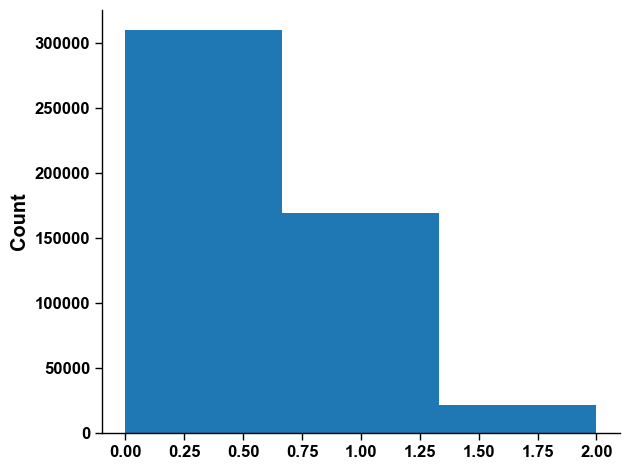

In [3]:
a, _, _ = plt.hist(samples[burnin:], bins=3)
plt.ylabel('Count')
print(a/nSample)